<a href="https://colab.research.google.com/github/vaguiarfinance/Case_Regressao/blob/main/Case5_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Realização a imortação do dataframe
Base_de_compras_ecommerce = pd.read_csv('Dataset_compras.csv', sep=",", encoding="Latin1")
Base_de_compras_ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Obtendo as informações para verificar se possui linhas vazias (Description e CustomerID)
Base_de_compras_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Utilizei o describe para entender a distribuição dos dados
Base_de_compras_ecommerce.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Identificando e contando os valores nulos
valores_nulos = Base_de_compras_ecommerce.isna().sum()
print(valores_nulos)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [43]:
df_sem_nulos = Base_de_compras_ecommerce.dropna()

# Exibir o DataFrame sem valores nulos
print(df_sem_nulos)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [44]:
# Identificar valores duplicados, notamos que 1 Invoice, pode ter diversmos itens logo é o mesmo CustomerID
df_sem_nulos[df_sem_nulos.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [45]:
# Limpando a base via Drop, assim excluiremos as colunas que possuem células
Base_limpa_ecommerce = df_sem_nulos.dropna()
display(Base_limpa_ecommerce)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [46]:
# Confirmando que todas as colunas agora possuem o mesmo número de linhas
Base_limpa_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [50]:
df_sem_duplicados = Base_limpa_ecommerce.drop_duplicates()
display(df_sem_duplicados)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [52]:
linhas_duplicadas = df_sem_duplicados.duplicated()

# Verificar se existem linhas duplicadas
if linhas_duplicadas.any():
    print("Existem linhas duplicadas no DataFrame.")
else:
    print("Não existem linhas duplicadas no DataFrame.")

Não existem linhas duplicadas no DataFrame.


In [54]:
# Avaliando se o dataframe possui preços abaixo de zero
filtro = df_sem_duplicados['UnitPrice'].isnull() | (df_sem_nulos['UnitPrice'] < 0)

# Verificar se existem valores nulos ou menores que zero
if filtro.any():
    print("Existem dados nulos ou menores que zero na coluna 'Preço'.")
else:
    print("Não existem dados nulos ou menores que zero na coluna 'Preço'.")

Não existem dados nulos ou menores que zero na coluna 'Preço'.


In [55]:
#  Verificando se o dataframe possui produtos com o valor zerado
Base_ordenada = df_sem_duplicados.sort_values(by='UnitPrice').head()
display(Base_ordenada)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
379913,569716,22778,GLASS CLOCHE SMALL,2,10/6/2011 8:17,0.0,15804.0,United Kingdom
446793,574920,22899,CHILDREN'S APRON DOLLY GIRL,1,11/7/2011 16:34,0.0,13985.0,United Kingdom
314745,564651,23270,SET OF 2 CERAMIC PAINTED HEARTS,96,8/26/2011 14:19,0.0,14646.0,Netherlands
314746,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,8/26/2011 14:19,0.0,14646.0,Netherlands
314747,564651,22955,36 FOIL STAR CAKE CASES,144,8/26/2011 14:19,0.0,14646.0,Netherlands


In [57]:
# Realizando os filtros solicitados na base

df_filtrado = df_sem_duplicados['Quantity'].isnull() | (df_sem_nulos['Quantity'] < 0)

# Verificar se existem valores nulos ou menores que zero
if filtro.any():
    print("Existem dados nulos ou menores que zero na coluna 'Quantidade'.")
else:
    print("Não existem dados nulos ou menores que zero na coluna 'Quantidade'.")


Não existem dados nulos ou menores que zero na coluna 'Quantidade'.


In [58]:
df_filtrado = df_sem_nulos.query('Quantity > 0')

# Exibir o dataset filtrado
print(df_filtrado)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [59]:
linhas_duplicadas = df_filtrado.duplicated()

# Verificar se existem linhas duplicadas
if linhas_duplicadas.any():
    print("Existem linhas duplicadas no DataFrame.")
else:
    print("Não existem linhas duplicadas no DataFrame.")


Existem linhas duplicadas no DataFrame.


In [60]:
# Remover as linhas duplicadas
df_sem_duplicados = df_filtrado.drop_duplicates()
display(df_sem_duplicados)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [74]:
# Confirmando as linhas removidas e avaliando os tipos de variaveis
df_sem_duplicados.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [62]:
# Convertendo o tipo dos dados apresentados

df_sem_duplicados['InvoiceDate'] = pd.to_datetime(df_sem_duplicados['InvoiceDate'])
df_sem_duplicados['CustomerID'] = df_sem_duplicados['CustomerID'].astype(int)
df_sem_duplicados.info()

<ipython-input-62-72ff1c1551d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicados['InvoiceDate'] = pd.to_datetime(df_sem_duplicados['InvoiceDate'])
<ipython-input-62-72ff1c1551d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicados['CustomerID'] = df_sem_duplicados['CustomerID'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

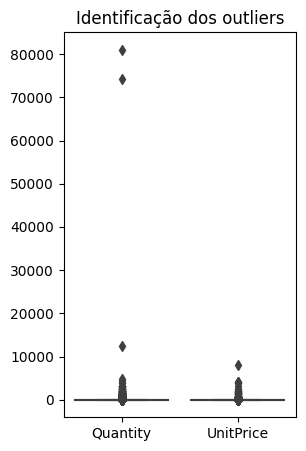

In [63]:
# Visualizando os outliers

df_tratado = df_sem_duplicados
plt.figure(figsize=(3,5))
sns.boxplot(data=df_tratado[['Quantity', 'UnitPrice']])
plt.title("Identificação dos outliers")
plt.show



In [75]:
# Remover os outliers extremos
df_sem_outliers = df_tratado[(df_tratado['Quantity'] <= 10000) & (df_tratado['UnitPrice'] <= 5000)]
print("\nDataFrame sem outliers extremos:")
print(df_sem_outliers)



DataFrame sem outliers extremos:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [76]:
#Verifiquei que o produto mais caro, encontra-se abaixo do 5k e os 10 primeiros são manuais
df_caros = df_sem_outliers.sort_values(by='UnitPrice', ascending=False).head(10)
display(df_caros)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502,United Kingdom
297438,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581,United Kingdom
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744,Singapore
406407,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744,Singapore
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744,Singapore
343000,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846,United Kingdom
150615,549468,M,Manual,1,2011-04-08 14:27:00,1867.86,17940,United Kingdom


In [77]:
# Criando uma coluna adicional com o preço total da compra

df_sem_outliers['Total_venda'] = df_sem_outliers['Quantity'] * df_sem_outliers['UnitPrice']
Base_ecommerce_total = df_sem_outliers
display(Base_ecommerce_total)


<ipython-input-77-4243557196cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['Total_venda'] = df_sem_outliers['Quantity'] * df_sem_outliers['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_venda
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [78]:
# Identificando a data da última compra, com a função MAX

ultima_compra = Base_ecommerce_total['InvoiceDate'].max()
print("Data da última compra:", ultima_compra)

Data da última compra: 2011-12-09 12:50:00


In [79]:
df_final = Base_ecommerce_total
display(df_final)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_venda
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [91]:
# Agrupando pelos países e verificando o ranking

vendas_paises = df_final.groupby('Country')['Total_venda'].sum()
top_dez_paises = vendas_paises.nlargest(10).reset_index()
display(top_dez_paises)

,Country,Total_venda
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


<function matplotlib.pyplot.show(close=None, block=None)>

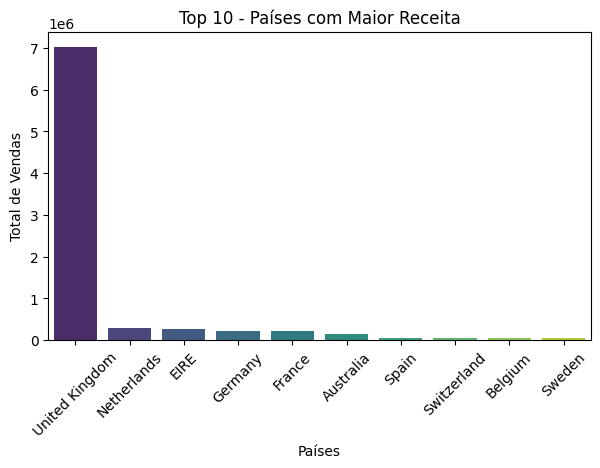

In [92]:
plt.figure(figsize=(7,4))
sns.barplot(x='Country' , y='Total_venda', data=top_dez_paises, palette='viridis')

plt.xlabel('Países')
plt.ylabel('Total de Vendas')
plt.title("Top 10 - Países com Maior Receita")
plt.xticks(rotation=45)
plt.show

In [98]:
# Agrupando pelos produtos e verificando o ranking

vendas_produtos = df_final.groupby('Description')['Quantity'].sum()
top_dez_produtos = vendas_produtos.nlargest(10).reset_index()
display(top_dez_produtos)

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1,JUMBO BAG RED RETROSPOT,46078
2,WHITE HANGING HEART T-LIGHT HOLDER,36706
3,ASSORTED COLOUR BIRD ORNAMENT,35263
4,PACK OF 72 RETROSPOT CAKE CASES,33670
5,POPCORN HOLDER,30919
6,RABBIT NIGHT LIGHT,27153
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25329
9,PACK OF 60 PINK PAISLEY CAKE CASES,24230


<function matplotlib.pyplot.show(close=None, block=None)>

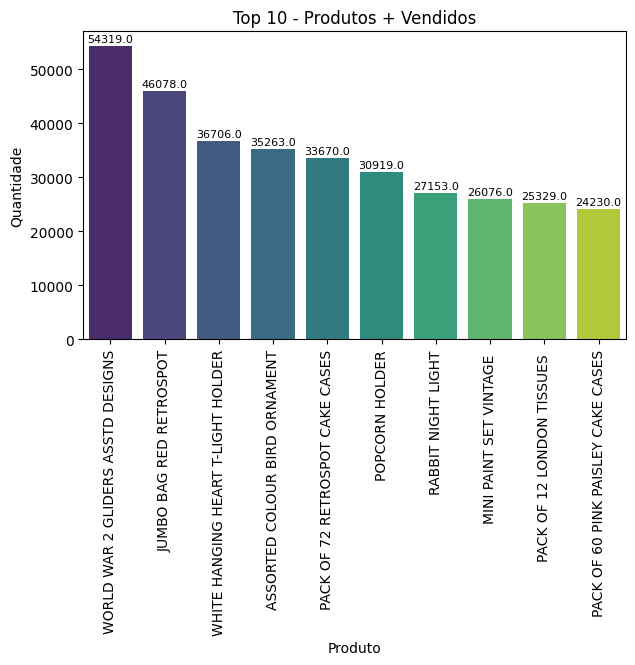

In [102]:
plt.figure(figsize=(7,4))
grafico_produtos = sns.barplot(x='Description' , y='Quantity', data=top_dez_produtos, palette='viridis')

# Adicionando a legenda do eixo x dentro de cada barra
for p in grafico_produtos.patches:
    grafico_produtos.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.title("Top 10 - Produtos + Vendidos")
plt.xticks(rotation=90)
plt.show

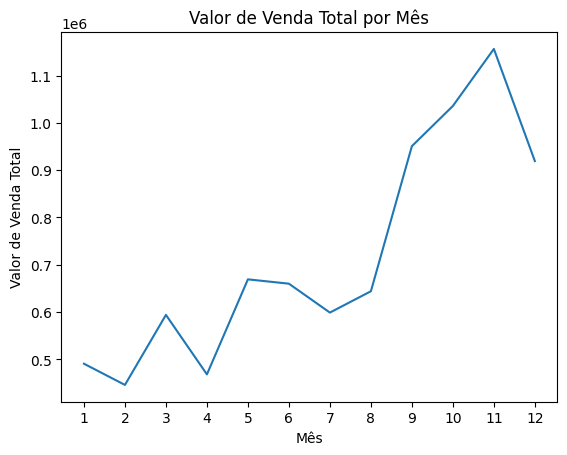

In [103]:
vendas_por_mes = df_final.groupby(df_final['InvoiceDate'].dt.month)['Total_venda'].sum()

# Plotar o gráfico de linha
plt.plot(vendas_por_mes.index, vendas_por_mes.values)
plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.title('Valor de Venda Total por Mês')
plt.xticks(range(1, 13))
plt.show()

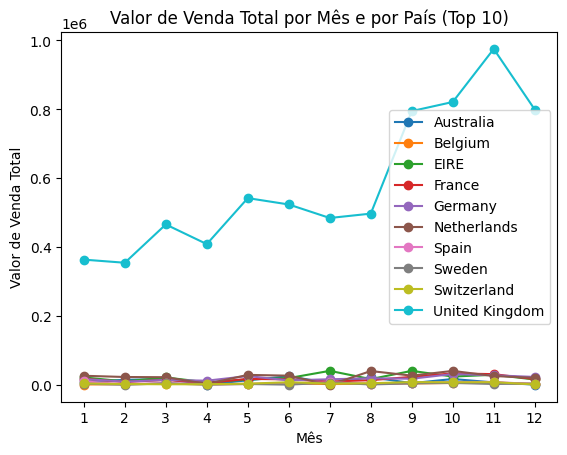

In [106]:
top_dez_paises = vendas_paises.nlargest(10).index

# Filtrar o DataFrame apenas para os top 10 países
df_top_10_paises = df_final[df_final['Country'].isin(top_dez_paises)]

# Agrupar os dados por mês e país, somando o valor de vendas
vendas_por_mes_pais = df_top_10_paises.groupby([df_top_10_paises['InvoiceDate'].dt.month, 'Country'])['Total_venda'].sum()

# Reformatar os dados em um DataFrame
df_vendas_por_mes_pais = vendas_por_mes_pais.unstack(level='Country')

# Plotar o gráfico de linhas
df_vendas_por_mes_pais.plot(kind='line', marker='o')
plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.title('Valor de Venda Total por Mês e por País (Top 10)')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

In [111]:
# Agrupar os dados por cliente e pedido/compra (InvoiceNo)
df_cliente_pedido = df_final.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max', 'Total_venda': 'sum'}).reset_index()
display(df_cliente_pedido)

,CustomerID,InvoiceNo,InvoiceDate,Total_venda
0,12347,537626,2010-12-07 14:57:00,711.79
1,12347,542237,2011-01-26 14:30:00,475.39
2,12347,549222,2011-04-07 10:43:00,636.25
3,12347,556201,2011-06-09 13:01:00,382.52
4,12347,562032,2011-08-02 08:48:00,584.91
...,...,...,...,...
18527,18283,579673,2011-11-30 12:59:00,220.31
18528,18283,580872,2011-12-06 12:02:00,208.00
18529,18287,554065,2011-05-22 10:39:00,765.28
18530,18287,570715,2011-10-12 10:23:00,1001.32


In [112]:
ultima_compra = df_final['InvoiceDate'].max()
df_cliente_pedido['Recência'] = (ultima_compra - df_cliente_pedido['InvoiceDate']).dt.days

# Calcular a frequência (F) e o ticket médio (M)
df_rfm = df_cliente_pedido.groupby('CustomerID').agg({'Recência': 'min', 'InvoiceNo': 'count', 'Total_venda': 'mean'}).reset_index()
df_rfm.columns = ['CustomerID', 'Recência', 'Frequência', 'Ticket Médio']

# Exibir o DataFrame com o RFM calculado para cada cliente
display(df_rfm)

,CustomerID,Recência,Frequência,Ticket Médio
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
...,...,...,...,...
4332,18280,277,1,180.600000
4333,18281,180,1,80.820000
4334,18282,7,2,89.025000
4335,18283,3,16,127.845625
